# Statistical Inference

## Introduction

**Statistical Inference** uses classical statistics to observe, study, and predict patterns resulting from data analysis and probabilistic modeling. There are two main approaches to the field, either **Frequentist** or **Bayesian**. The first approach implies a fixed distribution responsible for the generation of repeated patterns in the data. We can find the best estimate of the distribution's parameters given data samples. The last one implies that the state of the world can be updated using observed samples. The parameters of the distributions can themselves be represented using probability.

As an example, here is a situation explaining using the two frameworks. Imagine your phone is ringing in your house, and you want to reach it:
- **Frequentist**: I have a mental model of my house. Given the beeping sound, I can infer the house's area to search for my phone.
- **Bayesian**: On top of having a mental model of my house, I also remember from the past where I misplaced the phone. By combining my inferences using the beeps and my prior information on its location, I can identify the house area and locate my phone.

## Statistical Analysis Fundamentals

**Statistical Analysis** allows us to describe patterns observed in any given dataset via **Visualization** or **Statistical Descriptors**. In statistics, we are interested in studying a given **Sample** from a **Population** of **Individuals**.

```{note}
Statistical Descriptors are closely related to [Probability Descriptors](./2_probabilities_and_information_theory.ipynb). As we will observe later in the chapter, the Observed Mean can be associated with the Expectation, the Observed Variance to the Variance, and many more.
```

Suppose we design a study on the effectiveness of some medicine for some given disease. In that case, the sample corresponds to the set of patients who participated in the study, and the population represents all the people suffering from the studied disease.

To give credit to a **Study**, in other word to **Generalize** its results, the sample needs to **Reflect** the **Variation** present in the entire population of interest. One way to obtain such a sample is to include **Randomness** in the population's selection process.

Now that we have defined the context of application let us define all the fundamentals of Statistical Analysis.

```{note}
The different types of visualizations that can be used to express some data series' underlying variations have been discussed in the [Data Visualization Chapter](../1_data_representations/1_data_visualization.ipynb).
```

### Central Tendency

The first type of descriptor is the **Central Tendency**. It expresses the central value, the typical value for a data distribution. The most common central tendency measures are the **Mode**, the **Mean**, and the **Median**.

The **Mode** $M_o$ is the value that occurs most often in a given set of data values.

The **Mean** $\overline{x}$ refers to the **Arithmetic Mean**:

$$
\overline{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

In some cases it also refers to the **Weighted Arithmetic Mean**:

$$
\overline{x} = \frac{1}{n} \sum_{i=1}^{n} w_i x_i
$$

The **Median** $M_e$ is the variable responsible for separating the statistical distributions as two equally populated groups when organized in ascending order.

$$
M_e = \begin{cases}
x_{(n+1)/2} & \text{if}\;n\;\text{is odd} \\
\frac{x_{n/2} + x_{n/2 + 1}}{2} & \text{if}\;n\;\text{is even}
\end{cases}
$$

Let us consider the following example, which compiles one exam score for each of $22$ students and compute its central tendency metrics:

In [82]:
import pandas as pd
import numpy as np
np.random.seed(42)
pd.options.display.max_columns = 22


N = 22

# Generate Data for Example
df = pd.DataFrame(data=np.random.normal(13, 3, size=N).astype(int), columns=["score"])
df.head(N).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
score,14,12,14,17,12,12,17,15,11,14,11,11,13,7,7,11,9,13,10,8,17,12


In [77]:
print(f"Mode  : {df.score.mode().array[0]:.2f}")
print(f"Mean  : {df.score.mean():.2f}")
print(f"Median: {df.score.median():.2f}")

Mode  : 11.00
Mean  : 12.14
Median: 12.00


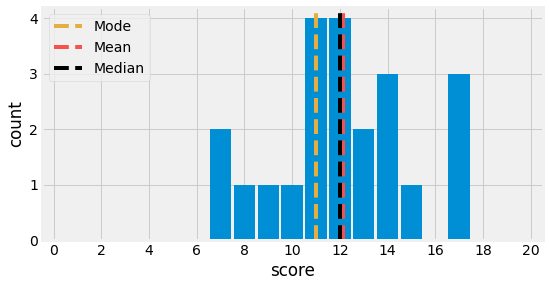

In [124]:
import matplotlib.pyplot as plt
import numpy as np
plt.ion()
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(8, 4), facecolor="white")
ax = fig.add_subplot(1, 1, 1)

ax.hist(df.score, bins=np.arange(20) - 0.5, rwidth=0.9)
line1 = ax.axvline(df.score.mode().array[0], color="#E5AE42", linestyle="--")
line2 = ax.axvline(df.score.mean(), color="#F6514C", linestyle="--")
line3 = ax.axvline(df.score.median(), color="k", linestyle="--")
ax.set_xlabel("score")
ax.set_ylabel("count")
ax.set_xticks(range(0, 20 + 1, 2))
ax.set_xlim(-0.5, 20.5)
ax.legend(handles=[line1, line2, line3], labels=["Mode", "Mean", "Median"])

fig.canvas.draw()

In [ ]:
from myst_nb import glue
glue("stat_centen_fig", fig, display=False)

```{glue:figure} stat_centen_fig
:align: center
:name: "stat-centen-fig"

Mode, Mean, and Median Visualization for a dataset containing exam's scores of $22$ students.
```

### Spread

The second type of descriptor is the **Spread** or **Dispersion** of a data series. It is often implied to be the spread around its mean. The most common spread measures are the **Range** and the **Variance**, thus the **Standard Deviation**.

The **Range** $R$ of a data series is defined as the difference between its maximum and minimum values. If the values are organized in ascending order, its:

$$
R = x_n - x_0
$$

The **Variance**, $s^2$ for some observed data series, $\sigma^2$ for some theoretical distribution, is the average sum of square difference from the mean. It explains how the data is distributed around the mean. The **Standard Deviation** is defined as the square root of the variance. It allows working with the same unit as the data.

$$
s^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \overline{x_i})^2
$$

Let us consider the same example as for the central tendency and compute the range and the standard deviation of the student scores:

In [130]:
print(f"Range: {df.score.max() - df.score.min():.2f}")
print(f"Std  : {df.score.std():.2f}")

Range: 10.00
Std  : 2.93


### Correlation

The last type of descriptor is the **Correlation** between two variables $X$ and $Y$. In satistical analysis, it is often easier to interpret the correlation between two variables of the same unit. If it is not the case, it is common practice to centre and reduce the variables $x = \frac{X - \mu}{\sigma}$.

One of the correlation metrics is the **Linear Correlation Coeficient** between $X$ and $Y$ and is defined as:

$$
\rho(X, Y) = \frac{Cov(X, Y)}{\sigma_X \sigma_Y},\;\;-1 \leq \rho(X, Y) \leq 1
$$

When $\rho(X, Y)$ is closed to $-1$ or $1$, it means that $X$ and $Y$ are linearly related, and the sign defines the direction of the linearity. If $\rho(X, Y)$ is null, there is no linear dependency, no correlation between the two variables.

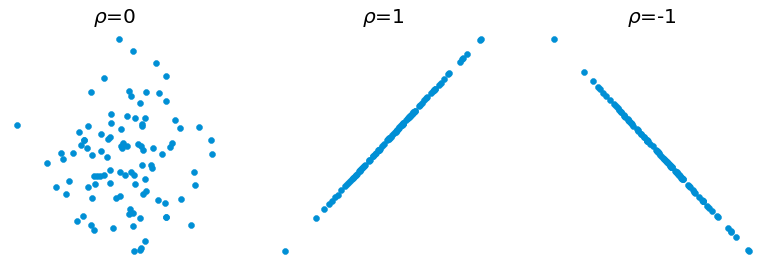

In [153]:
import matplotlib.pyplot as plt
import numpy as np
plt.ion()
plt.style.use('fivethirtyeight')
np.random.seed(42)

N = 100

fig = plt.figure(figsize=(12, 4), facecolor="white")
ax1, ax2, ax3 = [fig.add_subplot(1, 3, i + 1) for i in range(3)]

XY = np.random.normal(0, 1, (N, 2))
ax1.scatter(XY[:, 0], XY[:, 1])
ax1.set_axis_off()
ax1.title.set_text(r"$\rho$=0")

ax2.scatter(XY[:, 0], XY[:, 0])
ax2.set_axis_off()
ax2.title.set_text(r"$\rho$=1")

ax3.scatter(XY[:, 0], -XY[:, 0])
ax3.set_axis_off()
ax3.title.set_text(r"$\rho$=-1")

fig.subplots_adjust(hspace=0.40, wspace=0.25)
fig.canvas.draw()

In [ ]:
from myst_nb import glue
glue("stat_correl_fig", fig, display=False)

```{glue:figure} stat_correl_fig
:align: center
:name: "stat-correl-fig"

Visualization of the linear correlation coeficient between $X$ and $Y$.
```

## Sampling and Central Limit Theorem

### Sample
### Central Limit Theorem

## Point Estimate
## Confidence Intervals
## Hypothesis Testing
## Two Sample Hypothesis testing
## Chi-Square Test
## Anaysis of Variance
## Bayesian Inference